In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


BASE_PATH = os.path.dirname(os.getcwd())
PLOT_FILE_PATH = f"{BASE_PATH}/data/plot_data.ods"
IMAGES_DIR = f"{BASE_PATH}/data/images"

# Gráfico em 3D dos Experimentos da Curva de Pareto

In [6]:
pareto_g3 = pd.read_excel(PLOT_FILE_PATH, sheet_name="pareto_g3")
pareto_g6 = pd.read_excel(PLOT_FILE_PATH, sheet_name="pareto_g6")

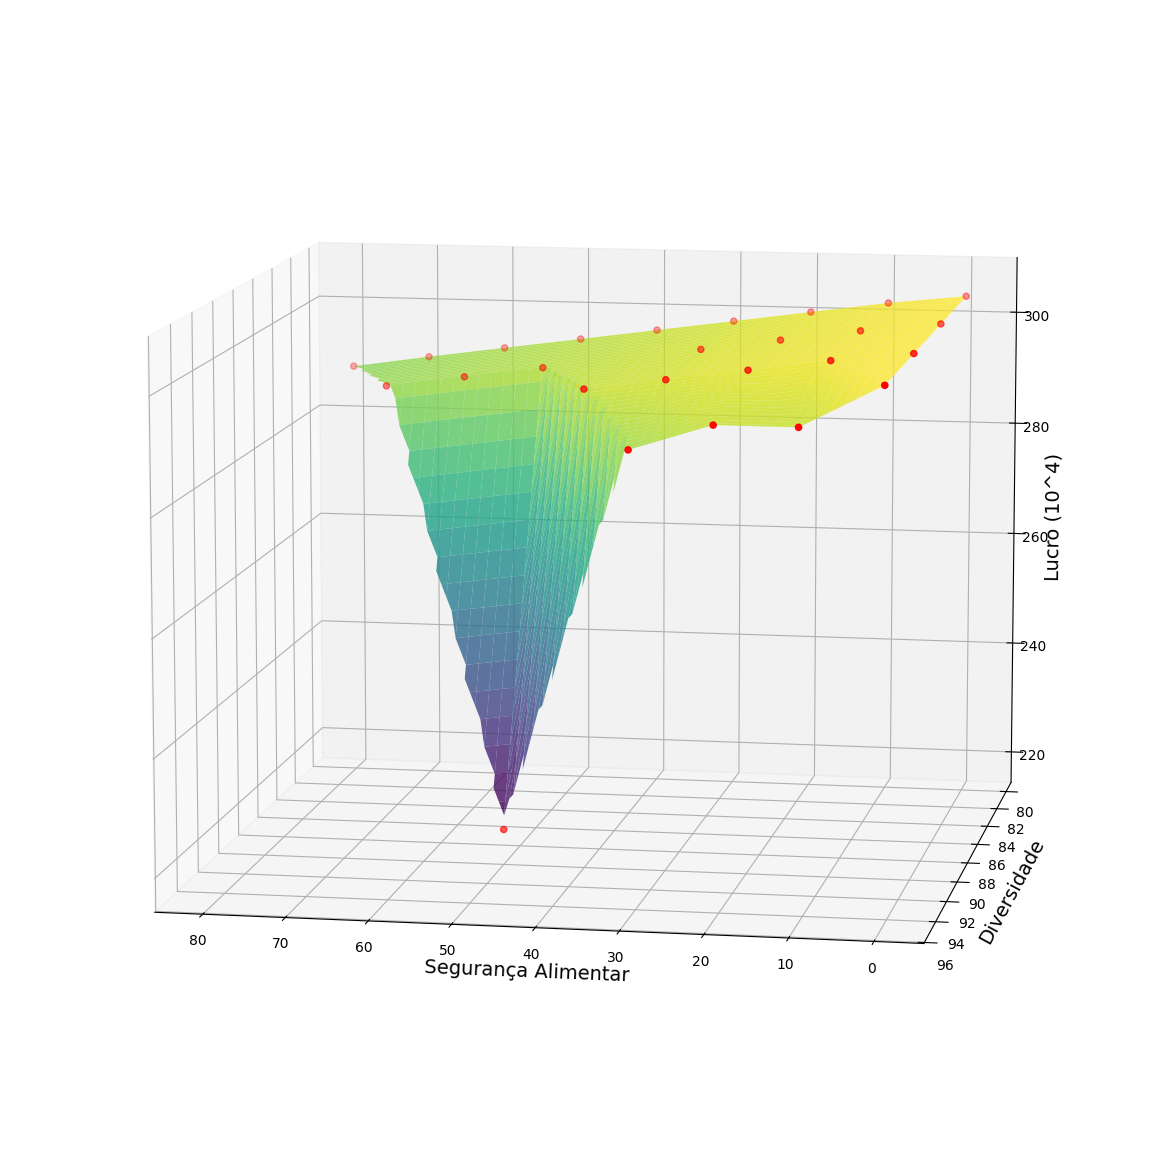

In [ ]:
# Separa os dados nos arrays x, y e z
df = pareto_g3.drop(["Tempo (s)", "GAP"], axis=1).dropna()
x = df["seguranca_alimentar"].values
y = df["diversidade"].values
z = df["lucro"].values / 10000

# Geração de grade regular para interpolar
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolação da superfície
zi = griddata((x, y), z, (xi, yi), method="linear")

# Desenho do gráfico
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(xi, yi, zi, cmap="viridis", alpha=0.8)
ax.scatter(x, y, z, color="red")

# Configuração das legendas
ax.set_xlabel("Segurança Alimentar", fontsize=14)
ax.set_ylabel("Diversidade", fontsize=14)
ax.set_zlabel("Lucro (10^4)", labelpad=1, fontsize=14)

# Visualização com duas rotações: (10, 100) e (10, -50)
ax.view_init(elev=10, azim=-50)
plt.tight_layout()
plt.show()

# Salva as figuras nas rotações
fig.savefig(f"{IMAGES_DIR}/pareto_g3_rotation_01.png", dpi=300, bbox_inches="tight")
ax.view_init(elev=10, azim=100)
fig.savefig(f"{IMAGES_DIR}/pareto_g3_rotation_02.png", dpi=300, bbox_inches="tight")

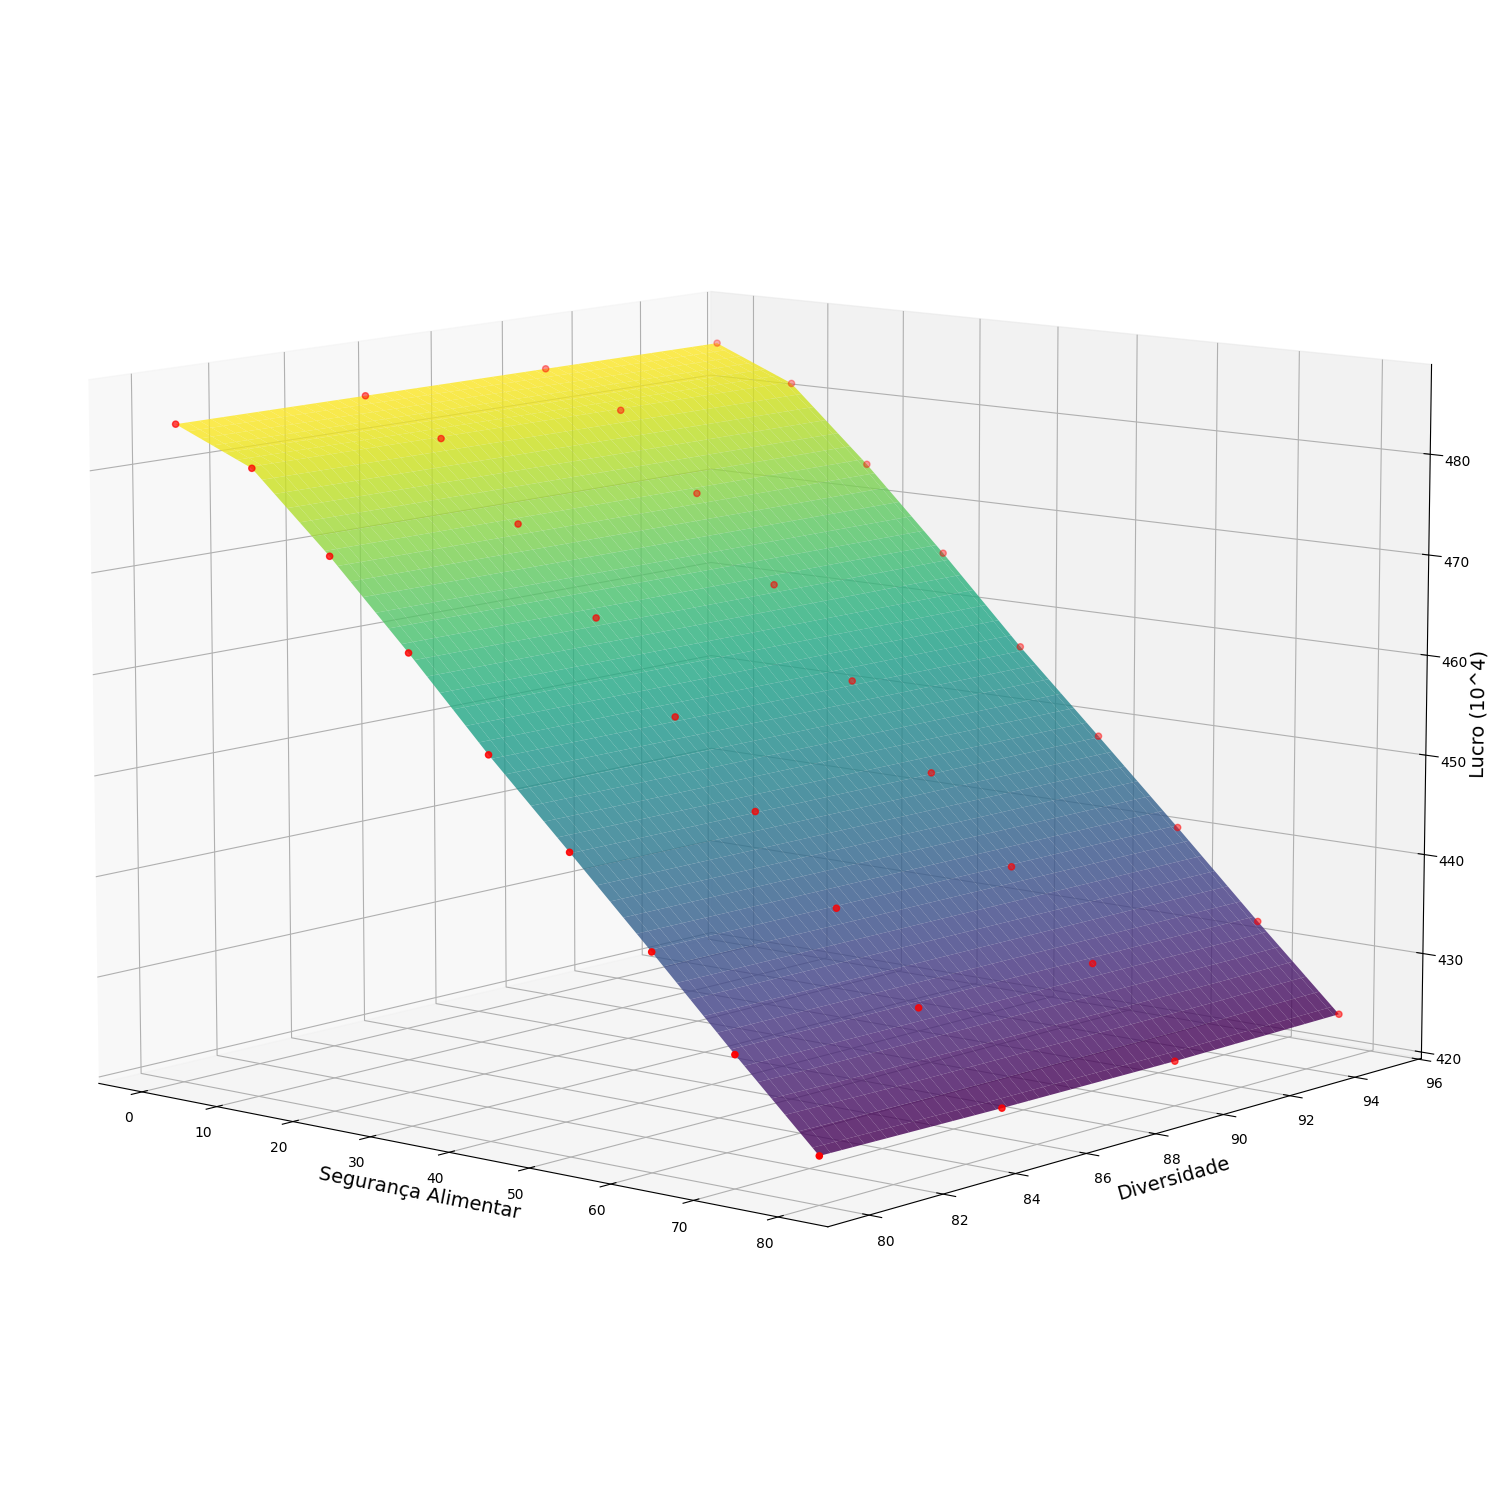

In [12]:
# Separa os dados nos arrays x, y e z
df = pareto_g6.drop(["Tempo (s)", "GAP"], axis=1).dropna()
x = df["seguranca_alimentar"].values
y = df["diversidade"].values
z = df["lucro"].values / 10000

# Geração de grade regular para interpolar
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolação da superfície
zi = griddata((x, y), z, (xi, yi), method="linear")

# Desenho do gráfico
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(xi, yi, zi, cmap="viridis", alpha=0.8)
ax.scatter(x, y, z, color="red")

# Configuração das legendas
ax.set_xlabel("Segurança Alimentar", fontsize=14)
ax.set_ylabel("Diversidade", fontsize=14)
ax.set_zlabel("Lucro (10^4)", labelpad=1, fontsize=14)

# Visualização com duas rotações: (10, 100) e (10, -50)
ax.view_init(elev=10, azim=-50)
plt.tight_layout()
plt.show()

# Salva as figuras nas rotações
fig.savefig(f"{IMAGES_DIR}/pareto_g6_rotation_01.png", dpi=300, bbox_inches="tight")
ax.view_init(elev=10, azim=50)
fig.savefig(f"{IMAGES_DIR}/pareto_g6_rotation_02.png", dpi=300, bbox_inches="tight")

# Curvas de Nível para Experimentos da Curva de Pareto

In [52]:
def plot_contour_line(
    df: pd.DataFrame,
    y_column: str,
    x_column: str,
    category_column: str,
    category_name: str,
    x_name: str,
    df_name: str
):
    # Encontra os intervalos de variação
    y_values = df[x_column].unique()
    y_values.sort()

    category_values = df[category_column].unique()
    category_values.sort()

    # Inicializa a visualização dos gráficos
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    cmap = plt.get_cmap("viridis", len(category_values))

    # Para cada valor de diversidade, recupera valores
    for idx, v in enumerate(category_values):
        subset = df.loc[df[category_column] == v].sort_values(x_column)
        x, y = [], []
        for i in range(0, len(subset)):
            y_value = subset[y_column].values[i] / 100000
            x_value = subset[x_column].values[i]

            if not np.isnan(y_value):
                x.append(x_value)
                y.append(y_value)

        ax.plot(x, y, label=f"{category_name} {v}", color=cmap(idx))

    # Organiza legendas
    ax.set_xlabel(x_name)
    ax.set_ylabel("Lucro 10^5 (R$)")

    # Salva a imagem
    fig.savefig(f"{IMAGES_DIR}/curva_de_nivel_{df_name}_{category_name}", dpi=300, bbox_inches="tight")

    plt.legend()
    plt.show()

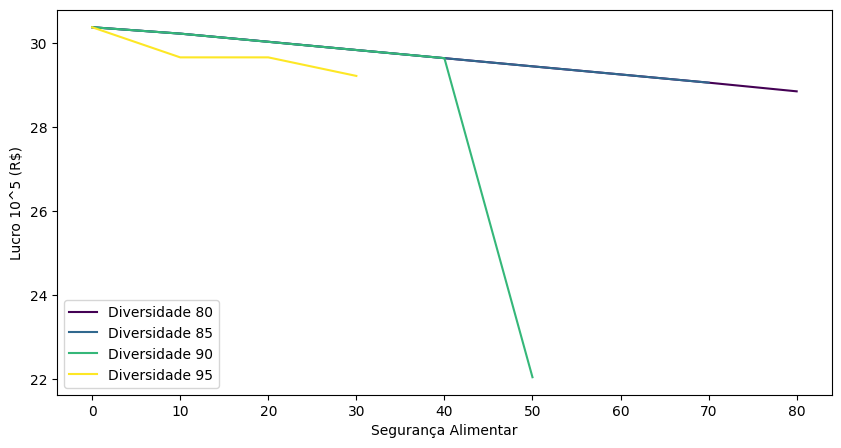

In [53]:
plot_contour_line(
    pareto_g3,
    "lucro",
    "seguranca_alimentar",
    "diversidade",
    "Diversidade",
    "Segurança Alimentar",
    "g3"
)

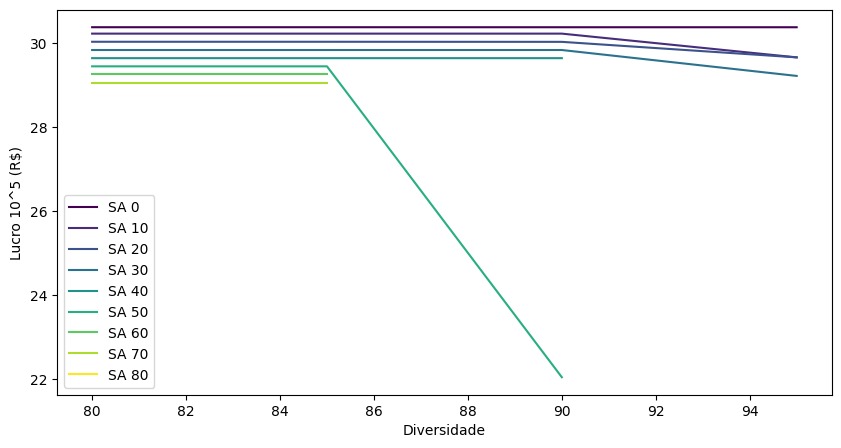

In [54]:
plot_contour_line(
    pareto_g3,
    "lucro",
    "diversidade",
    "seguranca_alimentar",
    "SA",
    "Diversidade",
    "g3"
)

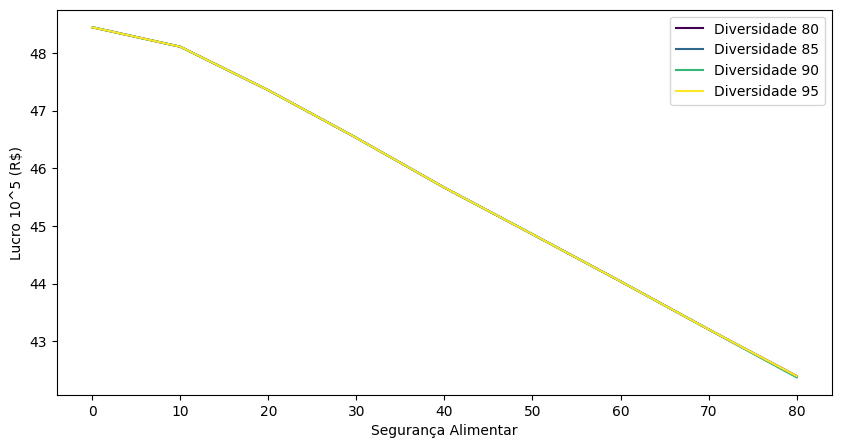

In [55]:
plot_contour_line(
    pareto_g6,
    "lucro",
    "seguranca_alimentar",
    "diversidade",
    "Diversidade",
    "Segurança Alimentar",
    "g6"
)

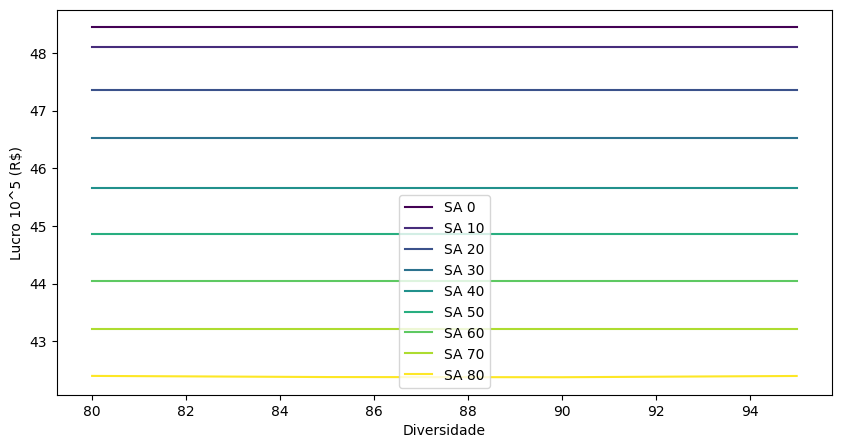

In [56]:
plot_contour_line(
    pareto_g6,
    "lucro",
    "diversidade",
    "seguranca_alimentar",
    "SA",
    "Diversidade",
    "g6"
)